In [1]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def model1(theta,t,b,g,l,m):
    theta1=theta[0]
    theta2=theta[1]
    dtheta1_dt=theta2
    dtheta2_dt=-(b/m)*theta2-(g/l)*np.sin(theta1)
    dtheta_dt=[dtheta1_dt,dtheta2_dt]
    return dtheta_dt

In [3]:
b=0.05

In [4]:
l=1.0

In [5]:
m=0.1

In [6]:
g=9.8

In [7]:
theta_0=[0,5]

In [8]:
t=np.linspace(0,10,150)

In [9]:
theta=odeint(model1,theta_0,t,args=(b,g,l,m))

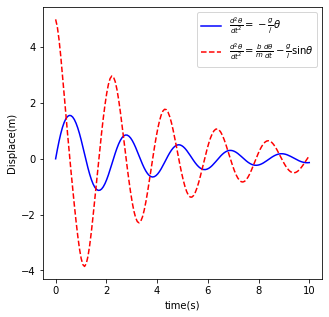

In [10]:
fig1=plt.figure(figsize=(5,5),facecolor='w')
ax1=fig1.add_subplot(1,1,1)
plt.plot(t,theta[:,0],'b-',label=r'$\frac{d^2\theta}{dt^2}=-\frac{g}{/}\theta$')
plt.plot(t,theta[:,1],'r--',label=r'$\frac{d^2\theta}{dt^2}=\frac{b}{m}\frac{d\theta}{dt}-\frac{g}{l}\sin\theta$')
plt.xlabel('time(s)')
plt.ylabel('Displace(m)')
plt.legend(loc='best')
plt.show()
fig1.savefig('dpendulum.jpeg')
plt.close()

In [11]:
lns=[]

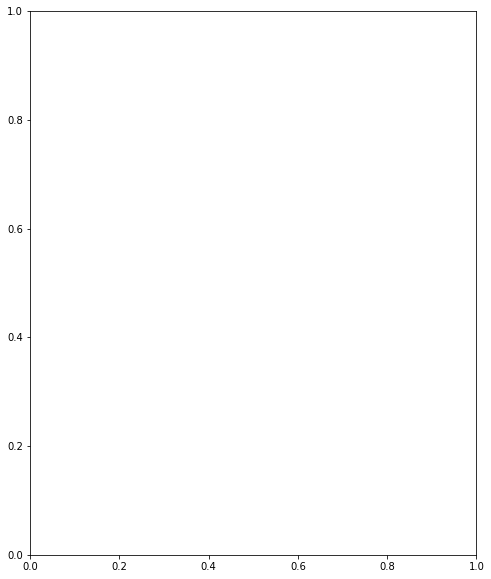

In [12]:
fig=plt.figure(figsize=(8,10),facecolor='w')
ax=fig.add_subplot(1,1,1)
plt.rcParams['font.size']=15

In [13]:
for i in range(len(theta)):
    ln,=ax.plot([0,np.sin(theta[i,0])],[0,-np.cos(theta[i,0])],color='k',lw=2)
    bob,=ax.plot(np.sin(theta[i,0]),-np.cos(theta[i,0]) ,'o',markersize=20,color='r')
    tm=ax.text(-0.9,0.25,'Time = %0.1f s'%t[i])
    lns.append([ln,bob,tm])

In [14]:
ax.set_aspect('equal','datalim')

In [15]:
anim=animation.ArtistAnimation(fig,lns,interval=50)
fn='pendulum_animation'
anim.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)